In [22]:
# Import Dependencies
import os
import pandas as pd
import requests
import json
import pprint
from config import (aqs_api_key)
from config import (email_address)
import matplotlib.pyplot as plt
import numpy as np

# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
sample_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass_data = []

In [36]:
# Create a DataFrame for New York and pull carbon monoxide data from API
ny_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : New_York}

# Call to url
ny_response = requests.get(sample_data_url, params = ny_params).json()
ny_data.append(ny_response)

ny_df = pd.DataFrame(ny_data[0]["Data"])
ny_df.head()
#ny_df.to_csv('NY_data.csv')

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04
1,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04
2,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04
3,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04
4,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-02-04


In [39]:
cleanNY_df = ny_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)

cleanNY_df.head

<bound method NDFrame.head of      state_code county_code site_number   latitude  longitude  \
0            36         001        0012  42.680750 -73.757330   
1            36         001        0012  42.680750 -73.757330   
2            36         001        0012  42.680750 -73.757330   
3            36         001        0012  42.680750 -73.757330   
4            36         001        0012  42.680750 -73.757330   
...         ...         ...         ...        ...        ...   
7200         36         081        0125  40.739264 -73.817694   
7201         36         081        0125  40.739264 -73.817694   
7202         36         081        0125  40.739264 -73.817694   
7203         36         081        0125  40.739264 -73.817694   
7204         36         081        0125  40.739264 -73.817694   

            parameter        sample_duration pollutant_standard  date_local  \
0     Carbon monoxide                 1 HOUR     CO 1-hour 1971  2019-01-01   
1     Carbon monoxide  8-HR RUN

In [40]:
cleanNY_df = cleanNY_df.loc[cleanNY_df["sample_duration"] == "8-HR RUN AVG END HOUR"]
cleanNY_df

,state_code,county_code,site_number,latitude,longitude,parameter,sample_duration,pollutant_standard,date_local,units_of_measure,...,first_max_value,first_max_hour,aqi,method,site_address,state,county,city,cbsa,date_of_last_change
1,36,001,0012,42.680750,-73.757330,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2019-01-01,Parts per million,...,0.3,10,3.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,"Albany-Schenectady-Troy, NY",2020-02-04
3,36,001,0012,42.680750,-73.757330,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2019-01-02,Parts per million,...,0.2,0,2.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,"Albany-Schenectady-Troy, NY",2020-02-04
5,36,001,0012,42.680750,-73.757330,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2019-01-03,Parts per million,...,0.2,0,2.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,"Albany-Schenectady-Troy, NY",2020-02-04
7,36,001,0012,42.680750,-73.757330,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2019-01-04,Parts per million,...,0.3,20,3.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,"Albany-Schenectady-Troy, NY",2020-02-04
9,36,001,0012,42.680750,-73.757330,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2019-01-05,Parts per million,...,0.3,6,3.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,"Albany-Schenectady-Troy, NY",2020-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,36,081,0125,40.739264,-73.817694,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2019-12-27,Parts per million,...,0.4,0,5.0,INSTRUMENTAL - Gas Filter Correlation Teledyne...,"I-495, H Harding Expwy and 153rd St",New York,Queens,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
7198,36,081,0125,40.739264,-73.817694,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2019-12-28,Parts per million,...,0.5,2,6.0,INSTRUMENTAL - Gas Filter Correlation Teledyne...,"I-495, H Harding Expwy and 153rd St",New York,Queens,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
7200,36,081,0125,40.739264,-73.817694,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2019-12-29,Parts per million,...,0.6,6,7.0,INSTRUMENTAL - Gas Filter Correlation Teledyne...,"I-495, H Harding Expwy and 153rd St",New York,Queens,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04
7202,36,081,0125,40.739264,-73.817694,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2019-12-30,Parts per million,...,0.4,0,5.0,INSTRUMENTAL - Gas Filter Correlation Teledyne...,"I-495, H Harding Expwy and 153rd St",New York,Queens,New York,"New York-Newark-Jersey City, NY-NJ-PA",2020-02-04


In [44]:
countydateaqiNY = cleanNY_df.groupby(["county", "date_local"])["aqi"].mean().reset_index()
countyaqiNY

,county,aqi
0,Albany,2.425287
1,Bronx,4.134247
2,Erie,3.272603
3,Monroe,3.293706
4,New York,4.027624
5,Queens,4.303199
6,Steuben,1.909341


In [31]:
countyaqiNY = cleanNY_df.groupby(["county"])["aqi"].mean().reset_index()
countyaqiNY

,county,aqi
0,Albany,2.425287
1,Bronx,4.134247
2,Erie,3.272603
3,Monroe,3.293706
4,New York,4.027624
5,Queens,4.303199
6,Steuben,1.909341


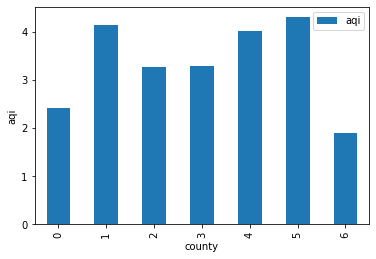

<Figure size 432x288 with 0 Axes>

In [32]:
aqi_chart = countyaqiNY.plot(kind='bar')
aqi_chart.set_xlabel("county")
aqi_chart.set_ylabel("aqi")


plt.show()
plt.tight_layout()

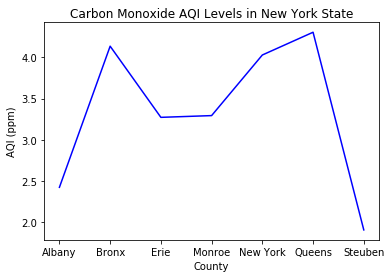

In [27]:
County = countyaqiNY["county"]
AQI = countyaqiNY["aqi"]
plt.title("Carbon Monoxide AQI Levels in New York State")
plt.xlabel("County")
plt.ylabel('AQI (ppm)')
aqibydate, = plt.plot(County, AQI, color="blue", label="Carbon Monoxide AQI Levels in New York State")
plt.show()

In [14]:
countymaxvalueNY = cleanNY_df.groupby(["county"])["first_max_value"].mean().reset_index()
countymaxvalueNY

,county,first_max_value
0,Albany,0.259560
1,Bronx,0.426341
2,Erie,0.333062
3,Monroe,0.343325
4,New York,0.412570
5,Queens,0.428870
6,Steuben,0.194560


In [25]:
NYbydate_df = cleanNY_df.groupby(["date_local"])["aqi"].mean().reset_index()
NYbydate_df

,date_local,aqi
0,2019-01-01,3.0
1,2019-01-02,3.2
2,2019-01-03,3.7
3,2019-01-04,5.4
4,2019-01-05,6.1
...,...,...
360,2019-12-27,4.7
361,2019-12-28,4.6
362,2019-12-29,5.0
363,2019-12-30,3.1


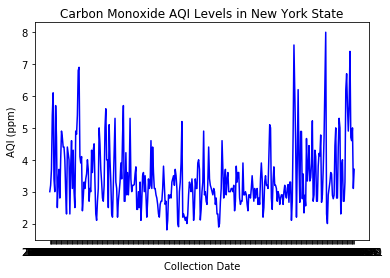

In [26]:
Time = NYbydate_df["date_local"]
AQI = NYbydate_df["aqi"]
plt.title("Carbon Monoxide AQI Levels in New York State")
plt.xlabel("Collection Date")
plt.ylabel('AQI (ppm)')
aqibydate, = plt.plot(Time, AQI, color="blue", label="Carbon Monoxide AQI Levels in New York State")
plt.show()

In [ ]:
# # Convert the date_local in the index into 'datetime' format
# group_mass.index = pd.to_datetime(group_mass.index)

# # Average out data on a per month basis
# mass_monthly = group_mass.resample('M').mean()
# mass_monthly.head()